In [25]:
import pandas as pd

# Importing the data as df and repeating the cleaning steps
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,Supplier,Booking_Code,Pickup_&_Dropoff_Point,Car_Brand_Model,Number_of_Car,Currency,Net_Selling_Price,Total_Promo_Price,Net_Sales,Booking_Type,...,Pickup_Time_Hour,Pickup_Time_Minute,Issuance_Time_Hour,Issuance_Time_Minute,Pickup_Date_Year,Pickup_Date_Month,Pickup_Date_Day,Issuance_Date_Year,Issuance_Date_Month,Issuance_Date_Day
0,Gratia;Holiday,28U2RPQGM14,CGK-Gambir,Gratia Holiday Budget MPV,1,IDR,146400,0.0,146400.0,ADVANCE_BOOKING,...,21,0,0,2,2024,4,1,2024,4,1
1,Gratia;Holiday,68U2RWXH317,Gambir-CGK,Gratia Holiday Budget MPV,1,IDR,140800,0.0,140800.0,ADVANCE_BOOKING,...,5,0,0,10,2024,4,3,2024,4,1
2,Gratia;Holiday,68U2T4WI152,CGK-Kelapa Gading,Gratia Holiday Budget MPV,1,IDR,146400,0.0,146400.0,ADVANCE_BOOKING,...,10,40,0,51,2024,4,1,2024,4,1
3,Gratia;Holiday,08U2TVD3K61,Duren Sawit-CGK,Gratia Holiday Budget MPV,1,IDR,173600,0.0,173600.0,ADVANCE_BOOKING,...,8,45,1,4,2024,4,1,2024,4,1
4,Gratia;Holiday,38U3AJ4CD09,Kelapa Gading-CGK,Gratia Holiday Budget MPV,1,IDR,140800,0.0,140800.0,ADVANCE_BOOKING,...,9,10,4,3,2024,4,1,2024,4,1


In [26]:

# Check the unique values for categorical columns
unique_values = {
    'Booking_Type': df['Booking_Type'].unique(),
    'Supplier': df['Supplier'].unique(),
    'Car_Brand_Model': df['Car_Brand_Model'].unique()
}

unique_values

{'Booking_Type': array(['ADVANCE_BOOKING', 'INSTANT_BOOKING'], dtype=object),
 'Supplier': array(['Gratia;Holiday'], dtype=object),
 'Car_Brand_Model': array(['Gratia Holiday Budget MPV', 'Gratia Holiday All New MPV',
        'Gratia Holiday Compact', 'Gratia Holiday Innova Reborn',
        'Gratia Holiday MPV Standard',
        'Gratia Holiday MPV Standard - Instant Booking',
        'Gratia Holiday SUV - Instant Booking',
        'Gratia Holiday Innova Reborn - Instant Booking',
        'Gratia Holiday Several Routes MPV Standard - Instant Booking',
        'Gratia Holiday Alphard',
        'Gratia Holiday Several Routes Budget MPV - Instant Booking',
        'Gratia Holiday Xpander', 'Gratia Holiday SUV',
        'Gratia Holiday Compact - Instant Booking',
        'Gratia Holiday Budget MPV - Instant Booking',
        'Gratia Holiday Minibus', 'Gratia Holiday Innova Zenix',
        'Gratia Holiday Wuling Confero',
        'Gratia Holiday Suzuki All New Ertiga'], dtype=object)}

In [27]:

df.dtypes


Supplier                   object
Booking_Code               object
Pickup_&_Dropoff_Point     object
Car_Brand_Model            object
Number_of_Car               int64
Currency                   object
Net_Selling_Price           int64
Total_Promo_Price         float64
Net_Sales                 float64
Booking_Type               object
Driver_Assigned_Time       object
Driver_name                object
Driver_Phone_Number        object
Booking_Time_Hour           int64
Booking_Time_Minute         int64
Pickup_Time_Hour            int64
Pickup_Time_Minute          int64
Issuance_Time_Hour          int64
Issuance_Time_Minute        int64
Pickup_Date_Year            int64
Pickup_Date_Month           int64
Pickup_Date_Day             int64
Issuance_Date_Year          int64
Issuance_Date_Month         int64
Issuance_Date_Day           int64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder


# Drop the 'Supplier' column
df.drop(columns='Supplier', inplace=True)

# Split the 'Pickup_&_Dropoff_Point' column into Pickup and Dropoff
if 'Pickup_&_Dropoff_Point' in df.columns:
    df[['Pickup_Point', 'Dropoff_Point']] = df['Pickup_&_Dropoff_Point'].str.split('-', n=1, expand=True)
    df.drop(columns='Pickup_&_Dropoff_Point', inplace=True)

# Process each object column with proper encoding
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    unique_vals = df[col].nunique()
    if unique_vals > 5:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        # One-hot encode with integers instead of True/False
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
        df.drop(columns=col, inplace=True)
        df = pd.concat([df, dummies], axis=1)

# Show result
df.head()

,Booking_Code,Car_Brand_Model,Number_of_Car,Net_Selling_Price,Total_Promo_Price,Net_Sales,Driver_name,Driver_Phone_Number,Booking_Time_Hour,Booking_Time_Minute,...,Pickup_Date_Year,Pickup_Date_Month,Pickup_Date_Day,Issuance_Date_Year,Issuance_Date_Month,Issuance_Date_Day,Pickup_Point,Dropoff_Point,Booking_Type_INSTANT_BOOKING,Driver_Assigned_Time_unassigned
0,5859,2,1,146400,0.0,146400.0,762,165,0,0,...,2024,4,1,2024,4,1,46,110,0,1
1,18041,2,1,140800,0.0,140800.0,32,180,0,6,...,2024,4,3,2024,4,1,95,57,0,1
2,18042,2,1,146400,0.0,146400.0,424,548,0,50,...,2024,4,1,2024,4,1,46,196,0,1
3,0,2,1,173600,0.0,173600.0,567,613,1,1,...,2024,4,1,2024,4,1,91,57,0,1
4,8982,2,1,140800,0.0,140800.0,368,389,4,0,...,2024,4,1,2024,4,1,163,57,0,1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['Net_Sales'])  # Features
y = df['Net_Sales']                 # Target

# Scale numerical features only (exclude one-hot or label-encoded categorical columns)
# For simplicity, we'll scale all columns since they're now all numeric and ML-safe
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Show shapes of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24477, 23), (6120, 23), (24477,), (6120,))

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grids
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]  # ✅ VALID
    },
    'Ridge': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}


# Define models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

import joblib  # for saving models

# Perform grid search and save best model
best_models = {}
for name in models:
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(models[name], param_grids[name], cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Save the best model
    joblib.dump(best_model, f"{name}_best_model.pkl")

    best_models[name] = {
        'Best Model': best_model,
        'Best Params': grid.best_params_,
        'RMSE': rmse,
        'R2 Score': r2
    }
    print(f"✅ Best Params: {grid.best_params_}")
    print(f"📊 RMSE: {rmse:.2f} | R²: {r2:.3f}")
    print(f"💾 Saved as: {name}_best_model.pkl")




🔍 Tuning LinearRegression...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Best Params: {'fit_intercept': True}
📊 RMSE: 13428.64 | R²: 0.983
💾 Saved as: LinearRegression_best_model.pkl

🔍 Tuning Ridge...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Best Params: {'alpha': 10.0}
📊 RMSE: 13428.51 | R²: 0.983
💾 Saved as: Ridge_best_model.pkl

🔍 Tuning RandomForest...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
📊 RMSE: 2849.20 | R²: 0.999
💾 Saved as: RandomForest_best_model.pkl

🔍 Tuning GradientBoosting...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
📊 RMSE: 2809.67 | R²: 0.999
💾 Saved as: GradientBoosting_best_model.pkl

🔍 Tuning XGBoost...
✅ Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
📊 RMSE: 6783.90 | R²: 0.996
💾 Saved as: XGBoost_best_model.pkl


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



📌 Evaluating LinearRegression...
🔍 RMSE: 13428.64
🔍 MAE: 2226.68
🔍 R² Score: 0.983


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


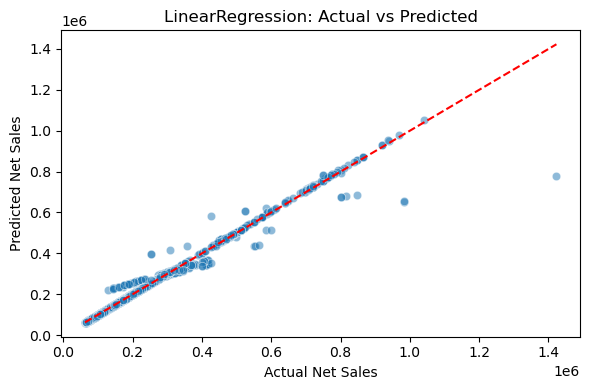

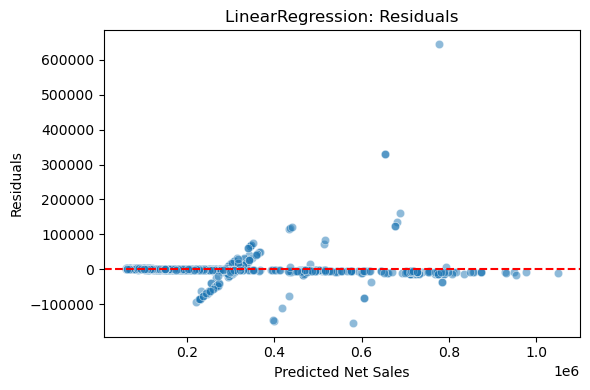

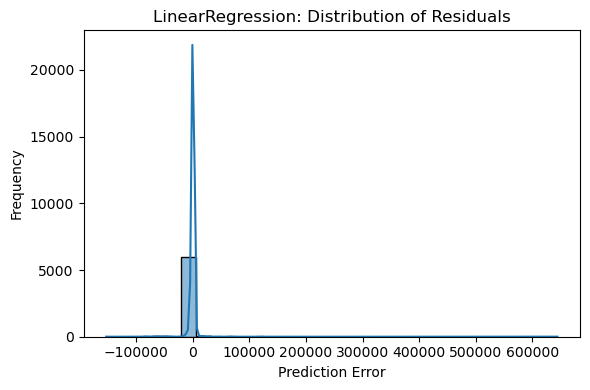


📌 Evaluating Ridge...
🔍 RMSE: 13428.51
🔍 MAE: 2212.58
🔍 R² Score: 0.983


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


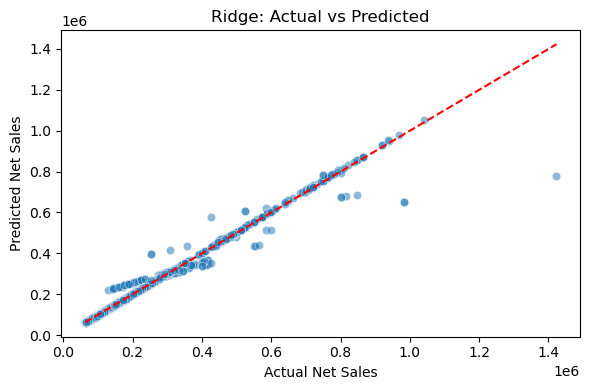

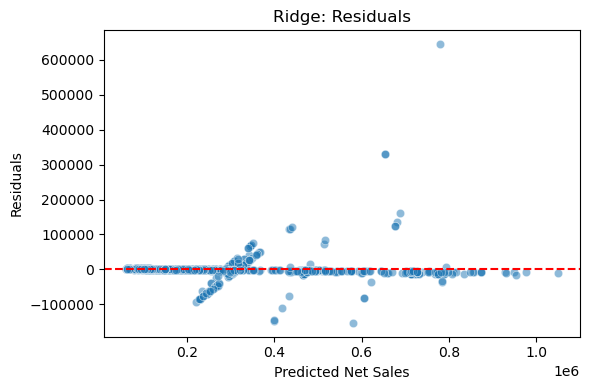

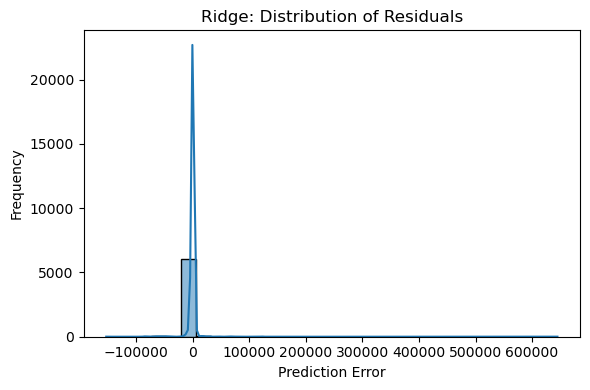


📌 Evaluating RandomForest...
🔍 RMSE: 2849.20
🔍 MAE: 297.17
🔍 R² Score: 0.999


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


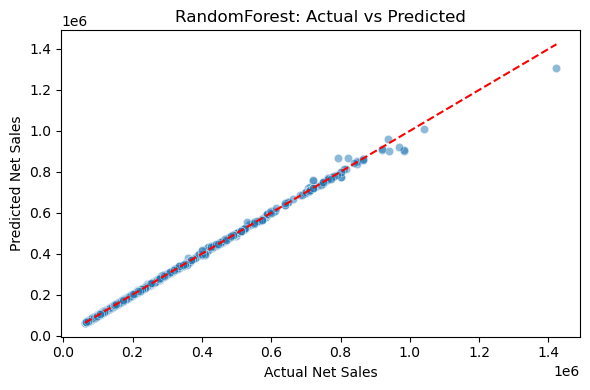

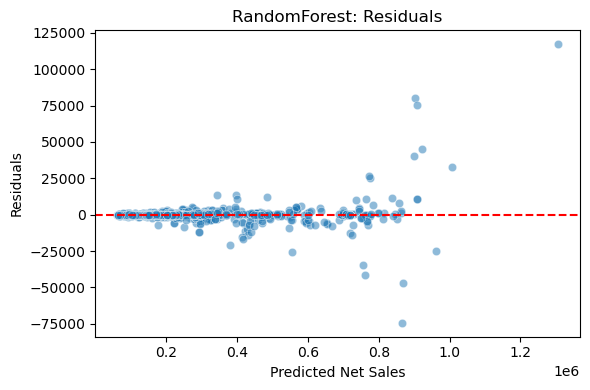

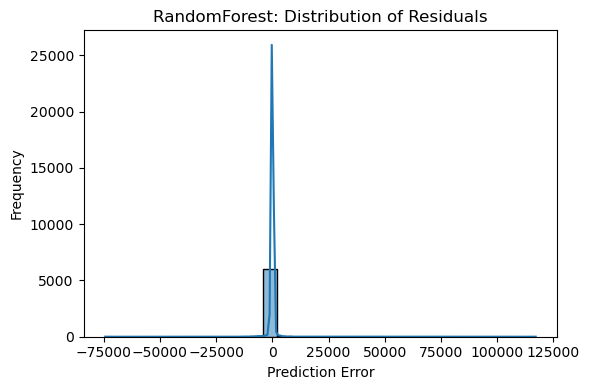


📌 Evaluating GradientBoosting...
🔍 RMSE: 2809.67
🔍 MAE: 1466.86
🔍 R² Score: 0.999


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


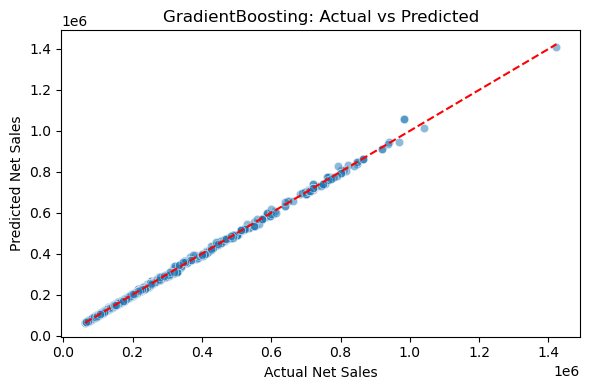

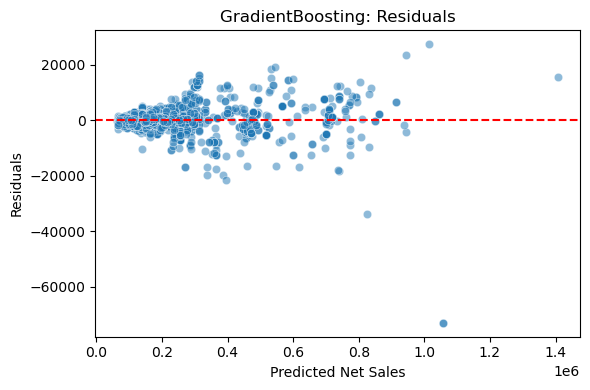

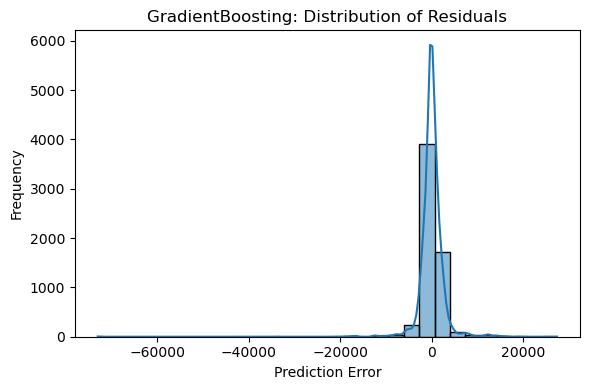


📌 Evaluating XGBoost...
🔍 RMSE: 6783.90
🔍 MAE: 2084.65
🔍 R² Score: 0.996


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


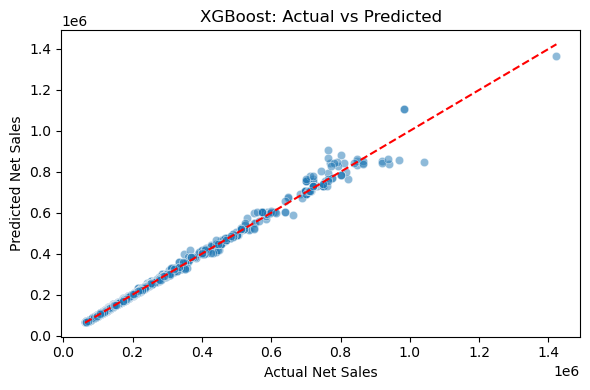

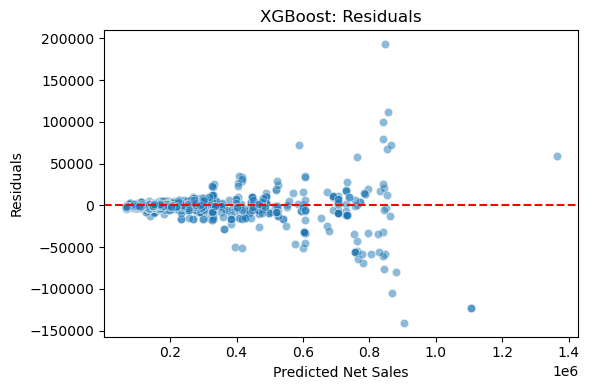

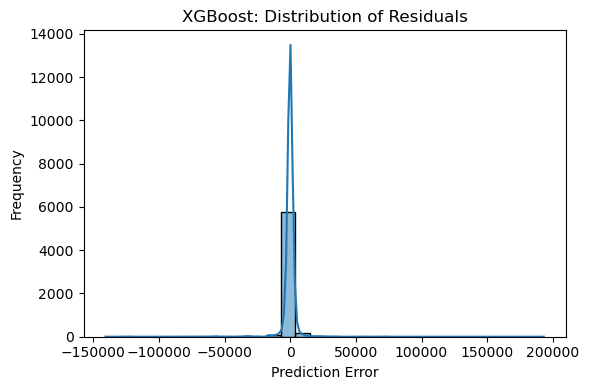

In [38]:
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

models_to_eval = ['LinearRegression', 'Ridge', 'RandomForest', 'GradientBoosting', 'XGBoost']

for name in models_to_eval:
    print(f"\n📌 Evaluating {name}...")
    
    # Load model
    model = joblib.load(f'{name}_best_model.pkl')
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"🔍 RMSE: {rmse:.2f}")
    print(f"🔍 MAE: {mae:.2f}")
    print(f"🔍 R² Score: {r2:.3f}")
    
    # Plot 1: Actual vs Predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.title(f'{name}: Actual vs Predicted')
    plt.xlabel('Actual Net Sales')
    plt.ylabel('Predicted Net Sales')
    plt.tight_layout()
    plt.show()

    # Plot 2: Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, linestyle='--', color='red')
    plt.title(f'{name}: Residuals')
    plt.xlabel('Predicted Net Sales')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()

    # Plot 3: Error distribution
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f'{name}: Distribution of Residuals')
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
